In [1]:
!pip install pandas




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install librosa transformers pydub noisereduce numpy matplotlib torch flask



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install tabulate


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


https://archive.ics.uci.edu/dataset/228/sms+spam+collection 

The link for the dataset

In [8]:
import pandas as pd 
import sklearn as sk   
import matplotlib as plt
import numpy as np
import tensorflow
from sklearn import metrics
from tabulate import tabulate
from tensorflow.keras import *
from sklearn import *
from collections import Counter
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv("sms+spam+collection/SMSSpamCollection", sep='\t', names=['Label', 'Message'])
#sep='\t': Specifies that the file is tab-separated (\t represents a tab character).
#names=['Label', 'Message']: Assigns column names to the resulting DataFrame. 
#Due to the original file being a .txt file, this is necessary so Python is able to read it and we can d pre-process the data


In [10]:
data.head()
#Previews the first 5 rows of the dataframe

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data['Message'] = data['Message'].str.lower()
#This converts all the text in the "Message" column of the data DataFrame to lowercase.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#0 for Ham & 1 for Spam

In [13]:
data['Label'] = le.fit_transform(data['Label'])
#Encodes labels


In [14]:
data.head()

,Label,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["Message"])
#The Tokenizer creates a vocabulary of unique words from the training data (X_train).
#Each unique word in the vocabulary is assigned a unique integer (index).
#Converts text into a numerical format that the RNN model can understand.


# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(data["Message"])
#Converts each email (text) into a sequence of integers using the vocabulary created during tokenization.
#Words not in the vocabulary (e.g., from X_test) are ignored.
#Represents text data as numerical sequences for the RNN.


# Pad sequences to the same length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
#Ensures all sequences have the same length (max_length).
#Sequences shorter than max_length are padded with zeros at the end (padding='post').
#Sequences longer than max_length are truncated.
#RNNs require input sequences to have the same length for batch processing.

vocab_size = len(tokenizer.word_index) + 1  # Total unique words + 1 for padding token
#The size of the vocabulary (i.e., total number of unique words in the dataset) plus 1 for the padding token.

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_resampled, y_resampled = sm.fit_resample(padded_sequences, data['Label'])

class_count_after_oversampling = Counter(y_resampled)

for label, count in class_count_after_oversampling.items():
    print(f"Class {label}: {count} samples")


Class 0: 4825 samples
Class 1: 4825 samples


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
#X = data['Messages']
#y = data['Labels]

In [19]:
bi_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#model.compile() function configures the model for training
#Optimizer: The optimiser adjusts the model's weights to minimize the loss function during training.
#The loss function measures the error between the predicted output and the actual target label. Used for binary classification tasks (e.g., phishing vs. safe emails). It calculates the negative log likelihood of the true class
#Metric: Defines how model performance will be evaluated during training and testing. Accuracy measures the proportion of correctly predicted labels.




In [20]:
history = bi_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    verbose=2
)

#he fit() method is used to train the model. It takes the training data and labels, along with other hyperparameters, and iteratively adjusts the model's internal weights to minimize the error (loss function).

#Input (X_train_pad): The padded sequences of tokenized email text (numerical input for the RNN).
#Target (y_train): Binary labels (0 = "Safe Email", 1 = "Phishing Email").
#validation_data=(X_test_pad, y_test): The test set is used as the validation set to monitor the model's performance on unseen data during training. Validation helps detect overfitting by showing the gap between training and validation performance.
#epochs=10: Number of complete passes through the entire training dataset. In each epoch, the model processes the entire training data once
#batch_size=8: Number of samples processed before updating the model’s weights. Smaller batch sizes: Allow more frequent updates but can make training noisy. Larger batch sizes: Smooth updates but require more memory and computation.
#verbose=2: Controls the level of detail printed during training: 0: No output. 1: Progress bar. 2: Detailed output per epoch (used here).



Epoch 1/15


212/212 - 41s - 195ms/step - accuracy: 0.8905 - loss: 0.2655 - val_accuracy: 0.9461 - val_loss: 0.1505
Epoch 2/15
212/212 - 51s - 241ms/step - accuracy: 0.9698 - loss: 0.0903 - val_accuracy: 0.9478 - val_loss: 0.1471
Epoch 3/15
212/212 - 52s - 244ms/step - accuracy: 0.9870 - loss: 0.0462 - val_accuracy: 0.9451 - val_loss: 0.1710
Epoch 4/15
212/212 - 52s - 244ms/step - accuracy: 0.9960 - loss: 0.0144 - val_accuracy: 0.9406 - val_loss: 0.2445
Epoch 5/15


In [ ]:
y_predictions = (bi_lstm_model.predict(X_test) > 0.5).astype(int)
# This line uses the trained neural network model to predict the class for the test dataset (`X_test`).
# `y_predictions`: Outputs a probability score (between 0 and 1) for each test sample, representing how likely it is to belong to the positive class (e.g., spam/phishing if 1, or safe if 0).
# - if the probability is greater than 0.5, it is classified as 1 (positive class, spam/phishing).
# - if the probability is less than or equal to 0.5, it is classified as 0 (negative class, safe email).


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step


Accuracy: 0.9392055267702936
Precision: 0.9393018510508807
Recall: 0.9392055267702936
F1-Score: 0.9392088637395716
              precision    recall  f1-score   support

         Ham       0.95      0.93      0.94      1469
        spam       0.93      0.95      0.94      1426

    accuracy                           0.94      2895
   macro avg       0.94      0.94      0.94      2895
weighted avg       0.94      0.94      0.94      2895



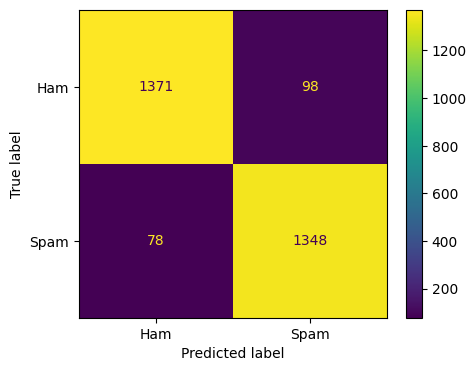

In [ ]:
accuracy_bidirectional = metrics.accuracy_score(y_test, y_predictions)
# Calculates the accuracy of the model's predictions on the test data by comparing the predicted labels (`y_predictions`) with the actual labels (`y_test`).

precision_bidrectional = metrics.precision_score(y_test, y_predictions, average='weighted')
#Calculates the precision of the model's predictions on the test data using the method precision_score() in metrics. Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.

recall_bidirectional = metrics.recall_score(y_test, y_predictions, average='weighted')
#Calculates the recall of the model's predictions on the test data's labels of test samples using the method recall_score() in metrics. Recall is the ratio of true positive predictions to the actual number of positive instances (true positives + false negatives).

f1_bidirectional = metrics.f1_score(y_test, y_predictions, average='weighted')
# Calculates the F1 score for the model's predictions on the test data's labels of test samples using the method f1_score() in metrics. The F1 score is the harmonic mean of precision and recall, providing a balanced measure that accounts for both false positives and false negatives.

# The `average='weighted'` parameter ensures that the various scores are calculated for each class and then averaged, weighted by the number of instances in each class, which is important when class sizes are imbalanced.




report_bidirectional = metrics.classification_report(y_test, y_predictions, target_names=['Ham', 'spam'])
print(f"Accuracy: {accuracy_bidirectional}")
print(f"Precision: {precision_bidrectional}")
print(f"Recall: {recall_bidirectional}")
print(f"F1-Score: {f1_bidirectional}")
print(report_bidirectional)

fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = metrics.confusion_matrix(y_test, y_predictions)
cmp = metrics.ConfusionMatrixDisplay(cm, display_labels = ['Ham', 'Spam'])
cmp.plot(ax = ax);



In [ ]:
def predict_input(model, tokenizer, max_length, user_input):
    
    user_input = user_input.lower()

    seqeunce = tokenizer.texts_to_sequences([user_input])

    padded_sequence = pad_sequences(seqeunce, maxlen=max_length, padding='post')

    prediction = model.predict(padded_sequence)[0, 0]

    label = "Spam" if prediction > 0.5 else "Ham"
    
    return label, prediction



In [ ]:
user_input = input("Enter a message: ")
label, confidence = predict_input(bi_lstm_model, tokenizer, max_length, user_input)
print(f"Prediction: {label} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: Spam (Confidence: 1.00)
